In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [2]:
df = pd.read_csv('df.csv')

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Proportion of Revenue from US')

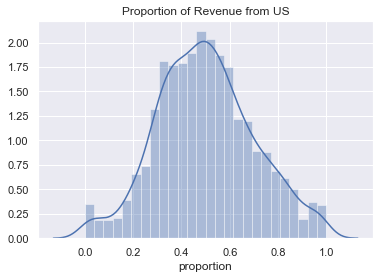

In [3]:
sns.distplot(df['proportion'])
plt.title('Proportion of Revenue from US')

In [4]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [5]:
target = df.loc[:,'proportion']

In [6]:
X_train1, X_test, y_train1, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train1, test_size=0.25, random_state=42)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.26632689072825744

In [7]:
poly2 = PolynomialFeatures(2)

lm_poly2 = LinearRegression()
lm_poly2.fit(poly2.fit_transform(X_train), y_train)
lm_poly2.score(poly2.fit_transform(X_train), y_train)

0.6341543009394803

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


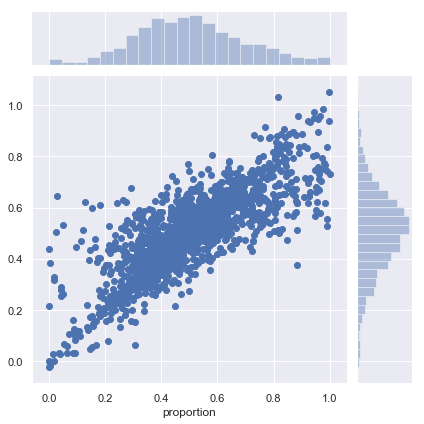

In [8]:
y_pred = lm_poly2.predict(poly2.transform(X_train))
sns.jointplot(y_train, y_pred)

In [9]:
RMSE(lm_poly2.predict(poly2.fit_transform(X_train)),y_train)

0.11962380825635513

In [10]:
lm_poly2.score(poly2.fit_transform(X_val), y_val)

-1.2056128892974747e+25

(array([  1.,   6.,  15.,  80., 286., 701., 257.,  87.,  22.,   3.]),
 array([-0.61651007, -0.50432044, -0.39213082, -0.27994119, -0.16775156,
        -0.05556194,  0.05662769,  0.16881731,  0.28100694,  0.39319657,
         0.50538619]),
 <a list of 10 Patch objects>)

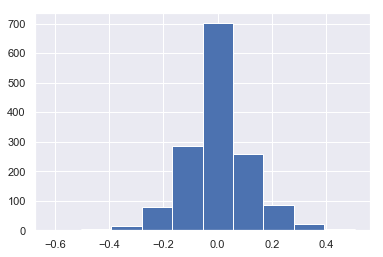

In [11]:
resp2 = y_train-lm_poly2.predict(poly2.fit_transform(X_train))
plt.hist(resp2)

(array([  1.,   0.,   3.,   4., 447.,  22.,   4.,   1.,   0.,   5.]),
 array([-5.39344726e+12, -4.27648875e+12, -3.15953024e+12, -2.04257174e+12,
        -9.25613228e+11,  1.91345281e+11,  1.30830379e+12,  2.42526230e+12,
         3.54222081e+12,  4.65917932e+12,  5.77613782e+12]),
 <a list of 10 Patch objects>)

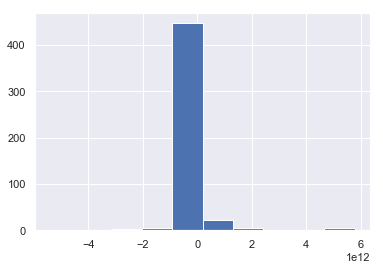

In [12]:
resp2 = y_val - lm_poly2.predict(poly2.fit_transform(X_val))
plt.hist(resp2)

In [13]:
poly3 = PolynomialFeatures(3)

lm_poly3 = LinearRegression()
lm_poly3.fit(poly3.fit_transform(X_train), y_train)
lm_poly3.score(poly3.fit_transform(X_train), y_train)

1.0

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


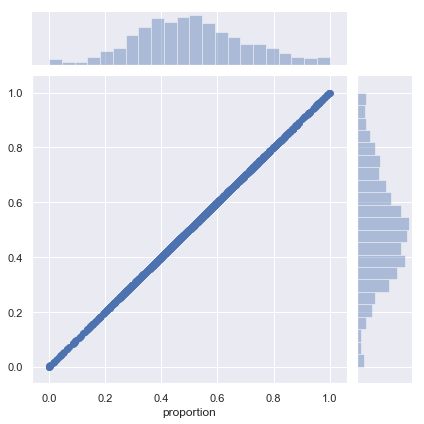

In [14]:
y_pred = lm_poly3.predict(poly3.transform(X_train))
sns.jointplot(y_train, y_pred)

In [15]:
RMSE(lm_poly3.predict(poly3.fit_transform(X_train)),y_train)

4.180259146468322e-13

In [16]:
lm_poly3.score(poly3.fit_transform(X_val), y_val)

-615.2397585453413

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        5.000e+00, 1.381e+03, 6.100e+01, 3.000e+00]),
 array([-9.34274880e-12, -8.15090773e-12, -6.95906666e-12, -5.76722559e-12,
        -4.57538452e-12, -3.38354345e-12, -2.19170238e-12, -9.99861305e-13,
         1.91979765e-13,  1.38382084e-12,  2.57566191e-12]),
 <a list of 10 Patch objects>)

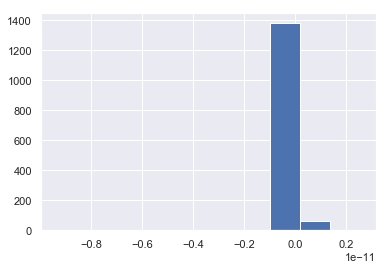

In [17]:
resp3 = y_train-lm_poly3.predict(poly3.fit_transform(X_train))
plt.hist(resp3)

(array([  4.,  19., 148., 275.,  26.,   9.,   4.,   0.,   0.,   2.]),
 array([-18.03241198, -12.19656239,  -6.36071279,  -0.52486319,
          5.31098641,  11.14683601,  16.98268561,  22.8185352 ,
         28.6543848 ,  34.4902344 ,  40.326084  ]),
 <a list of 10 Patch objects>)

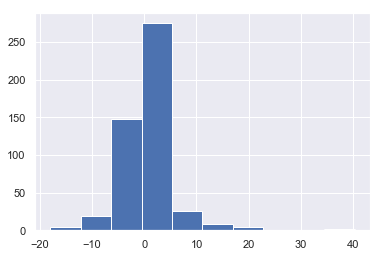

In [18]:
resp3 = y_val - lm_poly3.predict(poly3.fit_transform(X_val))
plt.hist(resp3)

In [19]:
r = RidgeCV()
r.fit(poly3.fit_transform(X_train),y_train)
r.score(poly3.fit_transform(X_train),y_train)

0.9187911529154917

In [20]:
r.score(poly3.fit_transform(X_val), y_val)

-3.918942723570076

(array([6.000e+00, 1.000e+01, 4.600e+01, 2.330e+02, 1.062e+03, 8.100e+01,
        1.500e+01, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.34761355, -0.26414856, -0.18068357, -0.09721858, -0.0137536 ,
         0.06971139,  0.15317638,  0.23664137,  0.32010636,  0.40357135,
         0.48703634]),
 <a list of 10 Patch objects>)

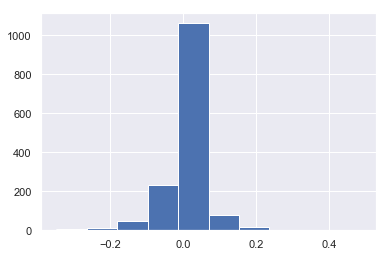

In [21]:
resr = y_train - r.predict(poly3.fit_transform(X_train))
plt.hist(resr)

(array([  2.,   1.,   1.,   2.,  15.,  81., 298.,  75.,   9.,   3.]),
 array([-3.13421847, -2.65010836, -2.16599824, -1.68188812, -1.197778  ,
        -0.71366789, -0.22955777,  0.25455235,  0.73866247,  1.22277258,
         1.7068827 ]),
 <a list of 10 Patch objects>)

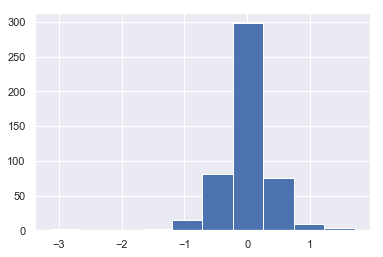

In [57]:
resr = y_val - r.predict(poly3.fit_transform(X_val))
plt.hist(resr)

In [58]:
l = LassoCV()
l.fit(poly3.fit_transform(X_train),y_train)
l.score(poly3.fit_transform(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_desc

0.1896617914852392

In [59]:
l.score(poly3.fit_transform(X_val), y_val)

0.08223031208233589

(array([  8.,  12.,  60., 251., 412., 337., 215., 112.,  48.,   3.]),
 array([-0.61622708, -0.49575076, -0.37527443, -0.2547981 , -0.13432177,
        -0.01384544,  0.10663088,  0.22710721,  0.34758354,  0.46805987,
         0.5885362 ]),
 <a list of 10 Patch objects>)

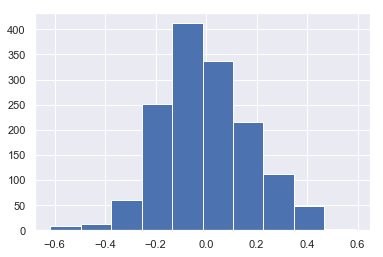

In [60]:
resl = y_train - l.predict(poly3.fit_transform(X_train))
plt.hist(resl)

(array([  6.,   5.,  15.,  70., 113., 125.,  73.,  46.,  25.,   9.]),
 array([-0.61071928, -0.49696823, -0.38321718, -0.26946614, -0.15571509,
        -0.04196405,  0.071787  ,  0.18553804,  0.29928909,  0.41304013,
         0.52679118]),
 <a list of 10 Patch objects>)

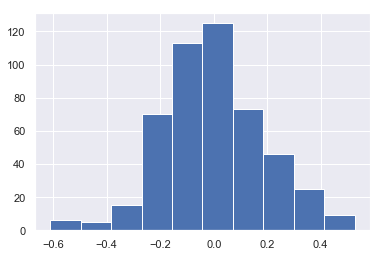

In [61]:
resl = y_val - l.predict(poly3.fit_transform(X_val))
plt.hist(resl)

In [62]:
# X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)], axis=0)
# y_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)], axis=0)
# X_train.shape

In [63]:
r.score(poly3.fit_transform(X_train),y_train)

0.9187911529154917

In [64]:
l.score(poly3.fit_transform(X_train),y_train)

0.1896617914852392

In [74]:
RMSE(r.predict(poly3.fit_transform(X_train)),y_train)

0.056359913739973504

In [72]:
RMSE(l.predict(poly3.fit_transform(X_train)),y_train)

0.17803353113627243

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


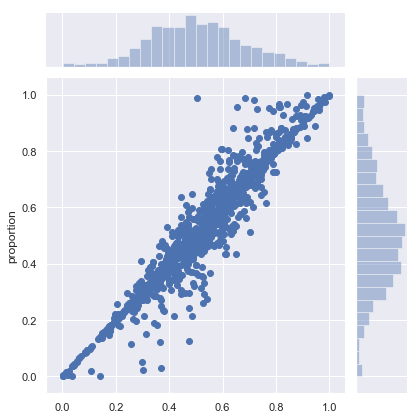

In [71]:
sns.jointplot(r.predict(poly3.fit_transform(X_train)),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


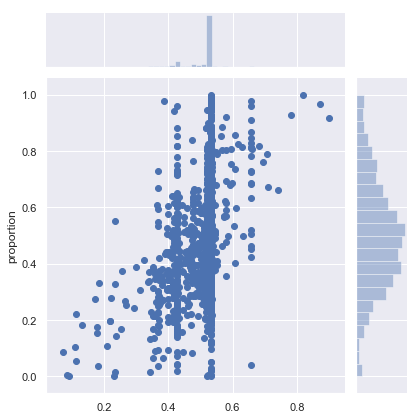

In [73]:
sns.jointplot(l.predict(poly3.fit_transform(X_train)),y_train)

In [75]:
RMSE(r.predict(poly3.fit_transform(X_val)),y_val)

0.43808008942810317

In [76]:
RMSE(l.predict(poly3.fit_transform(X_val)),y_val)

0.18922760259914226

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


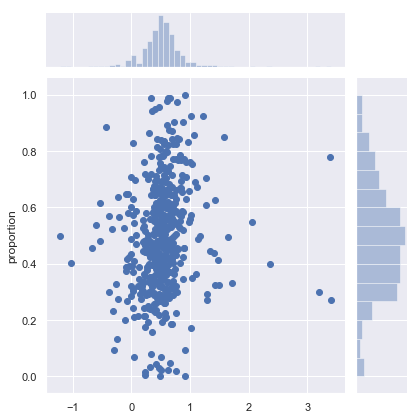

In [77]:
sns.jointplot(r.predict(poly3.fit_transform(X_val)),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


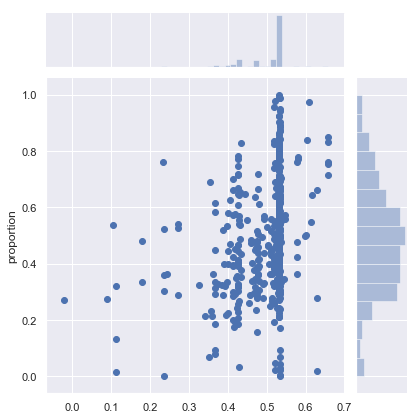

In [78]:
sns.jointplot(l.predict(poly3.fit_transform(X_val)),y_val)

In [79]:
m.score(X_val,y_val)

0.18368975905446794

(array([ 12.,  54., 126., 261., 422., 365., 160.,  40.,  12.,   6.]),
 array([-0.54229661, -0.42426144, -0.30622627, -0.1881911 , -0.07015593,
         0.04787924,  0.16591441,  0.28394957,  0.40198474,  0.52001991,
         0.63805508]),
 <a list of 10 Patch objects>)

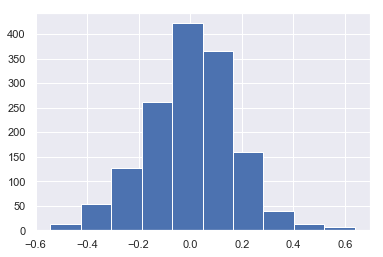

In [81]:
plt.hist(m.predict(X_train)-y_train)

(array([  9.,  25.,  45.,  89., 151., 102.,  45.,   9.,   8.,   4.]),
 array([-0.50930044, -0.39540526, -0.28151008, -0.16761489, -0.05371971,
         0.06017547,  0.17407066,  0.28796584,  0.40186102,  0.51575621,
         0.62965139]),
 <a list of 10 Patch objects>)

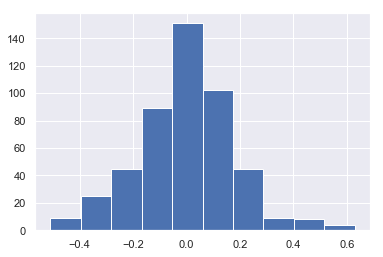

In [82]:
plt.hist(m.predict(X_val)-y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


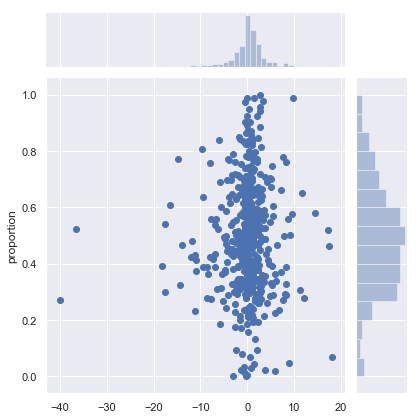

In [83]:
sns.jointplot(lm_poly3.predict(poly3.transform(X_val)), y_val)

In [94]:
c = zip(features.columns,m.coef_)
c = list(c)
c = sorted(c, key=lambda x: x[1])
c

[('PG-13', -187021115633.8955),
 ('R', -184147099559.98175),
 ('PG', -145431570895.92514),
 ('USA', -96599500949.90913),
 ('UK', -68775941689.71451),
 ('G', -68071412762.368645),
 ('Not Rated', -52127923652.00125),
 ('other_country', -35729193359.75231),
 ('France', -33931256357.66072),
 ('Germany', -33465431689.957294),
 ('Canada', -27791694623.42053),
 ('China', -23432773855.46496),
 ('Australia', -22022671962.220406),
 ('Hong Kong', -17085183869.210747),
 ('Spain', -16112225432.91292),
 ('Japan', -15075496776.005453),
 ('NC-17', -14974958223.179218),
 ('cum_ww_gross', -0.03684611752276168),
 ('Animation', -0.026407241821289062),
 ('year', -0.025740125511817074),
 ('budget', -0.018902141242209982),
 ('Romance', -0.01716899871826172),
 ('Fantasy', -0.01325225830078125),
 ('Adventure', -0.010829925537109375),
 ('Thriller', -0.009008407592773438),
 ('Drama', -0.008843421936035156),
 ('Musical', -0.005920886993408203),
 ('Music', -0.005316495895385742),
 ('Crime', -0.004812717437744141),

In [96]:
c = zip(features.columns,lm_poly2.coef_)
c = list(c)
c = sorted(c, key=lambda x: x[1])
c

[('other_director', -406296571940.8687),
 ('Paul W.S. Anderson', -277422104175.2309),
 ('Comedy', -256157537326.3593),
 ('Steven Soderbergh', -234389859631.48843),
 ('NC-17', -191184763402.76056),
 ('Steven Spielberg', -156653790684.1461),
 ('Action', -154757794324.12228),
 ('USA', -139206761589.7211),
 ('Tim Burton', -136392359031.30585),
 ('Ron Howard', -112904744142.76286),
 ('Germany', -97402961383.61453),
 ('Spain', -80499340435.42987),
 ('Michael Bay', -80400758544.78755),
 ('Antoine Fuqua', -79110523323.24268),
 ('Roland Emmerich', -68659488919.47445),
 ('Musical', -64552289020.97882),
 ('user_rating', -62855379025.14239),
 ('R', -60479490010.180435),
 ('Japan', -57683502821.88174),
 ('Australia', -31734811024.453144),
 ('Thriller', -22813842363.366604),
 ('ratings_count', -17833720723.205944),
 ('Sport', -14434964458.25721),
 ('Drama', -13658880742.87535),
 ('History', -7575111381.245272),
 ('Crime', -5976065383.548666),
 ('runtime', 1663139841.4895926),
 ('Western', 4846541681

In [97]:
c = zip(features.columns,lm_poly3.coef_)
c = list(c)
c = sorted(c, key=lambda x: x[1])
c

[('runtime', -0.04293466612644617),
 ('user_rating', -0.013084757439833379),
 ('PG-13', -0.01279214120895157),
 ('Sport', -0.007645036795071261),
 ('Animation', -0.006237691792600148),
 ('Adventure', -0.005222150980524632),
 ('Sci-Fi', -0.0038778832664014226),
 ('Documentary', -0.0012328958076070326),
 ('Antoine Fuqua', -0.0010013233971884368),
 ('NC-17', -0.0009854133832155742),
 ('budget', -0.0002653058417228868),
 ('other_country', -0.0002538727898215797),
 ('G', -8.415684219437435e-05),
 ('Action', -6.886952159536576e-05),
 ('Gore Verbinski', -3.919015200016985e-05),
 ('Michael Bay', -2.9850662216996077e-05),
 ('Not Rated', -2.7651009053545447e-05),
 ('Canada', -2.3935499772802238e-05),
 ('Mystery', -1.999335730022515e-05),
 ('Brett Ratner', -1.5236101142579082e-05),
 ('Steven Spielberg', -8.560318788708226e-06),
 ('Joel Schumacher', -5.996662062810446e-06),
 ('Paul W.S. Anderson', -5.319432274811567e-06),
 ('Steven Soderbergh', 1.1180756025443033e-05),
 ('Spain', 1.24588440736784e

In [98]:
c = zip(features.columns,r.coef_)
c = list(c)
c = sorted(c, key=lambda x: x[1])
c

[('Australia', -0.006453920229618583),
 ('ratings_count', -0.004070214997950382),
 ('Adventure', -0.0038280641469558957),
 ('runtime', -0.003755986338723532),
 ('user_rating', -0.0027433987429834575),
 ('Antoine Fuqua', -0.001974001161256943),
 ('Documentary', -0.0013276296154392405),
 ('cum_ww_gross', -0.000903997649910309),
 ('Family', -0.0007851410536073189),
 ('PG-13', -0.000763416422988306),
 ('Biography', -0.00020003028827527162),
 ('USA', -0.0001041465743979602),
 ('Germany', -1.4006848679605e-05),
 ('G', -9.346936114994532e-06),
 ('Western', -3.96510879827247e-06),
 ('Mystery', -2.547386157487581e-06),
 ('France', -1.7398838575258747e-06),
 ('Drama', -9.467634655530435e-07),
 ('Tim Burton', -6.848290217497572e-07),
 ('David Fincher', -6.02685204824283e-07),
 ('China', -4.836692337867329e-07),
 ('UK', -4.802385932678159e-07),
 ('Ron Howard', -4.78635522195689e-07),
 ('Gore Verbinski', -2.3616355928378487e-07),
 ('Spain', -2.127540483845848e-07),
 ('Canada', -1.7904791167802986e-

In [99]:
c = zip(features.columns,l.coef_)
c = list(c)
c = sorted(c, key=lambda x: x[1])
c

[('budget', 0.0),
 ('cum_ww_gross', -0.0),
 ('ratings_count', -0.0),
 ('runtime', -0.0),
 ('user_rating', -0.0),
 ('year', -0.0),
 ('Australia', -0.0),
 ('Canada', -0.0),
 ('China', -0.0),
 ('France', -0.0),
 ('Germany', -0.0),
 ('Hong Kong', 0.0),
 ('Japan', 0.0),
 ('Spain', -0.0),
 ('UK', -0.0),
 ('USA', -0.0),
 ('other_country', 0.0),
 ('G', -0.0),
 ('NC-17', 0.0),
 ('Not Rated', -0.0),
 ('PG', -0.0),
 ('PG-13', 0.0),
 ('R', -0.0),
 ('Antoine Fuqua', 0.0),
 ('Brett Ratner', -0.0),
 ('Chris Columbus', -0.0),
 ('Clint Eastwood', 0.0),
 ('David Fincher', -0.0),
 ('Gore Verbinski', -0.0),
 ('Ivan Reitman', 0.0),
 ('Joel Schumacher', -0.0),
 ('M. Night Shyamalan', -0.0),
 ('Michael Bay', -0.0),
 ('Paul W.S. Anderson', -0.0),
 ('Ridley Scott', -0.0),
 ('Robert Zemeckis', -0.0),
 ('Roland Emmerich', -0.0),
 ('Ron Howard', -0.0),
 ('Steven Soderbergh', -0.0),
 ('Steven Spielberg', 0.0),
 ('Tim Burton', -0.0),
 ('Tony Scott', -0.0),
 ('other_director', -0.0),
 ('Action', 0.0),
 ('Adventure',